In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [25]:
data = pd.read_csv('obesitas.csv')
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [26]:
data.columns = ['Usia','Jenis Kelamin', 'Tinggi Badan', 'Berat Badan', 'Konsumsi Alkohol', 'Konsumsi Makanan Tinggi Kalori',
       'Frekuensi Konsumsi Sayuran', 'Jumlah Makan Utama', 'Pemantauan Konsumsi Kalori', 'Merokok', 'Konsumsi Air Harian', 'Riwayat Keluarga dengan Kegemukan', 'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi',
       'Konsumsi Makanan di Antara Waktu Makan', 'Transportasi yang Digunakan', 'Obesitas']

data

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [27]:
data = data.drop_duplicates()
data

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [28]:
data['Obesitas'] = data['Obesitas'].apply(lambda x: x.replace('_', ' '))
data['Transportasi yang Digunakan'] = data['Transportasi yang Digunakan'].apply(lambda x: x.replace('_', ' '))

data['Tinggi Badan'] = data['Tinggi Badan'].round(1)
data['Berat Badan'] = data['Berat Badan'].round(1)
data['Usia'] = data['Usia'].round(1)
data

C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3439887803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Obesitas'] = data['Obesitas'].apply(lambda x: x.replace('_', ' '))
C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3439887803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transportasi yang Digunakan'] = data['Transportasi yang Digunakan'].apply(lambda x: x.replace('_', ' '))
C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3439887803.py:4: SettingWithCopyWarning: 
A value is tr

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.0,Female,1.6,64.0,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public Transportation,Normal Weight
1,21.0,Female,1.5,56.0,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public Transportation,Normal Weight
2,23.0,Male,1.8,77.0,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public Transportation,Normal Weight
3,27.0,Male,1.8,87.0,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight Level I
4,22.0,Male,1.8,89.8,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,Female,1.7,131.4,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public Transportation,Obesity Type III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public Transportation,Obesity Type III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public Transportation,Obesity Type III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public Transportation,Obesity Type III


In [29]:
for x in ['Frekuensi Konsumsi Sayuran', 'Jumlah Makan Utama', 'Konsumsi Air Harian',
          'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi']:
    data[x] = data[x].apply(round)  # Membulatkan nilai
    value = np.array(data[x])
    print(x, ':', 'min:', np.min(value), 'max:', np.max(value), data[x].dtype)
    print(data[x].unique())  # Menampilkan nilai unik pada kolom

Frekuensi Konsumsi Sayuran : min: 1 max: 3 int64
[2 3 1]
Jumlah Makan Utama : min: 1 max: 4 int64
[3 1 4 2]
Konsumsi Air Harian : min: 1 max: 3 int64
[2 3 1]
Frekuensi Aktivitas Fisik : min: 0 max: 3 int64
[0 3 2 1]
Waktu Menggunakan Perangkat Teknologi : min: 0 max: 2 int64
[1 0 2]


C:\Users\asus\AppData\Local\Temp\ipykernel_14796\2846740612.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x] = data[x].apply(round)  # Membulatkan nilai


In [30]:
mapping1 = {1: '1', 2: '2', 3: '3', 4: '3+'}
mapping2 = {1: '1', 2: '2', 3: '3'}
mapping3 = {0: '0', 1: '1', 2: '2', 3: '3'} #tidak pernah, jarang, sering, sangat sering
mapping4 = {0: '0', 1: '1', 2: '2'} #cukup sering, sering, sangat sering

In [31]:
data['Jumlah Makan Utama'] =data['Jumlah Makan Utama'].replace(mapping1)
data['Konsumsi Air Harian'] = data['Konsumsi Air Harian'].replace(mapping2)
data['Frekuensi Aktivitas Fisik'] = data['Frekuensi Aktivitas Fisik'].replace(mapping3)
data['Waktu Menggunakan Perangkat Teknologi'] = data['Waktu Menggunakan Perangkat Teknologi'].replace(mapping4)
data

C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3656696039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Jumlah Makan Utama'] =data['Jumlah Makan Utama'].replace(mapping1)
C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3656696039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Konsumsi Air Harian'] = data['Konsumsi Air Harian'].replace(mapping2)
C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3656696039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Usia,Jenis Kelamin,Tinggi Badan,Berat Badan,Konsumsi Alkohol,Konsumsi Makanan Tinggi Kalori,Frekuensi Konsumsi Sayuran,Jumlah Makan Utama,Pemantauan Konsumsi Kalori,Merokok,Konsumsi Air Harian,Riwayat Keluarga dengan Kegemukan,Frekuensi Aktivitas Fisik,Waktu Menggunakan Perangkat Teknologi,Konsumsi Makanan di Antara Waktu Makan,Transportasi yang Digunakan,Obesitas
0,21.0,Female,1.6,64.0,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public Transportation,Normal Weight
1,21.0,Female,1.5,56.0,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,23.0,Male,1.8,77.0,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public Transportation,Normal Weight
3,27.0,Male,1.8,87.0,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight Level I
4,22.0,Male,1.8,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21.0,Female,1.7,131.4,Sometimes,yes,3,3,no,no,2,yes,2,1,Sometimes,Public Transportation,Obesity Type III
2107,22.0,Female,1.7,133.7,Sometimes,yes,3,3,no,no,2,yes,1,1,Sometimes,Public Transportation,Obesity Type III
2108,22.5,Female,1.8,133.7,Sometimes,yes,3,3,no,no,2,yes,1,1,Sometimes,Public Transportation,Obesity Type III
2109,24.4,Female,1.7,133.3,Sometimes,yes,3,3,no,no,3,yes,1,1,Sometimes,Public Transportation,Obesity Type III


In [32]:
categorical_columns = data.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_columns)

Kolom kategorikal: Index(['Jenis Kelamin', 'Konsumsi Alkohol', 'Konsumsi Makanan Tinggi Kalori',
       'Jumlah Makan Utama', 'Pemantauan Konsumsi Kalori', 'Merokok',
       'Konsumsi Air Harian', 'Riwayat Keluarga dengan Kegemukan',
       'Frekuensi Aktivitas Fisik', 'Waktu Menggunakan Perangkat Teknologi',
       'Konsumsi Makanan di Antara Waktu Makan', 'Transportasi yang Digunakan',
       'Obesitas'],
      dtype='object')


In [33]:
from sklearn.preprocessing import LabelEncoder

# Mengabaikan kolom "Obesitas" dari kategori kolom yang di-encode
categorical_columns = categorical_columns.drop('Obesitas')

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Kolom "Obesitas" tidak diubah
print(data['Obesitas'].head())  # Mengecek bahwa kolom "Obesitas" tetap tidak berubah


0          Normal Weight
1          Normal Weight
2          Normal Weight
3     Overweight Level I
4    Overweight Level II
Name: Obesitas, dtype: object


C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3079547832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3079547832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\asus\AppData\Local\Temp\ipykernel_14796\3079547832.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [34]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=["Obesitas"])  # Fitur prediktor
y = data["Obesitas"]                # Target

In [35]:
data = data.drop(columns=["Merokok", "Pemantauan Konsumsi Kalori", "Transportasi yang Digunakan",
                          "Frekuensi Konsumsi Sayuran", "Jumlah Makan Utama", "Frekuensi Aktivitas Fisik",
                          "Konsumsi Alkohol", "Waktu Menggunakan Perangkat Teknologi"])

In [36]:
numerik = ['Usia','Jenis Kelamin', 'Tinggi Badan', 'Berat Badan', 'Konsumsi Makanan Tinggi Kalori',
                               'Riwayat Keluarga dengan Kegemukan', 'Konsumsi Air Harian',
           'Konsumsi Makanan di Antara Waktu Makan']

In [37]:
Y = data['Obesitas']
Y

0             Normal Weight
1             Normal Weight
2             Normal Weight
3        Overweight Level I
4       Overweight Level II
               ...         
2106       Obesity Type III
2107       Obesity Type III
2108       Obesity Type III
2109       Obesity Type III
2110       Obesity Type III
Name: Obesitas, Length: 2087, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [39]:
from collections import Counter
print(f'Banyak train: {Counter(y_train)}')
print(f'Banyak test: {Counter(y_test)}')

Banyak train: Counter({'Obesity Type I': 276, 'Obesity Type III': 264, 'Normal Weight': 231, 'Overweight Level II': 230, 'Obesity Type II': 227, 'Insufficient Weight': 221, 'Overweight Level I': 220})
Banyak test: Counter({'Obesity Type I': 75, 'Obesity Type II': 70, 'Overweight Level II': 60, 'Obesity Type III': 60, 'Overweight Level I': 56, 'Normal Weight': 51, 'Insufficient Weight': 46})


In [40]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
dtr.predict(X_test)

array(['Obesity Type II', 'Normal Weight', 'Overweight Level II',
       'Obesity Type II', 'Obesity Type I', 'Normal Weight',
       'Obesity Type II', 'Obesity Type III', 'Obesity Type I',
       'Overweight Level I', 'Normal Weight', 'Overweight Level II',
       'Overweight Level II', 'Obesity Type I', 'Obesity Type I',
       'Overweight Level I', 'Overweight Level I', 'Overweight Level I',
       'Obesity Type III', 'Obesity Type II', 'Overweight Level I',
       'Insufficient Weight', 'Overweight Level II', 'Obesity Type III',
       'Overweight Level I', 'Obesity Type II', 'Obesity Type I',
       'Obesity Type II', 'Obesity Type III', 'Obesity Type I',
       'Obesity Type I', 'Obesity Type III', 'Insufficient Weight',
       'Overweight Level II', 'Insufficient Weight',
       'Overweight Level II', 'Overweight Level II', 'Obesity Type III',
       'Obesity Type II', 'Overweight Level I', 'Obesity Type II',
       'Overweight Level I', 'Overweight Level II', 'Obesity Type II'

In [42]:
# Akurasi Decision Tree
acc_dtr = dtr.score(X_test,y_test)
acc_dtr

0.9354066985645934

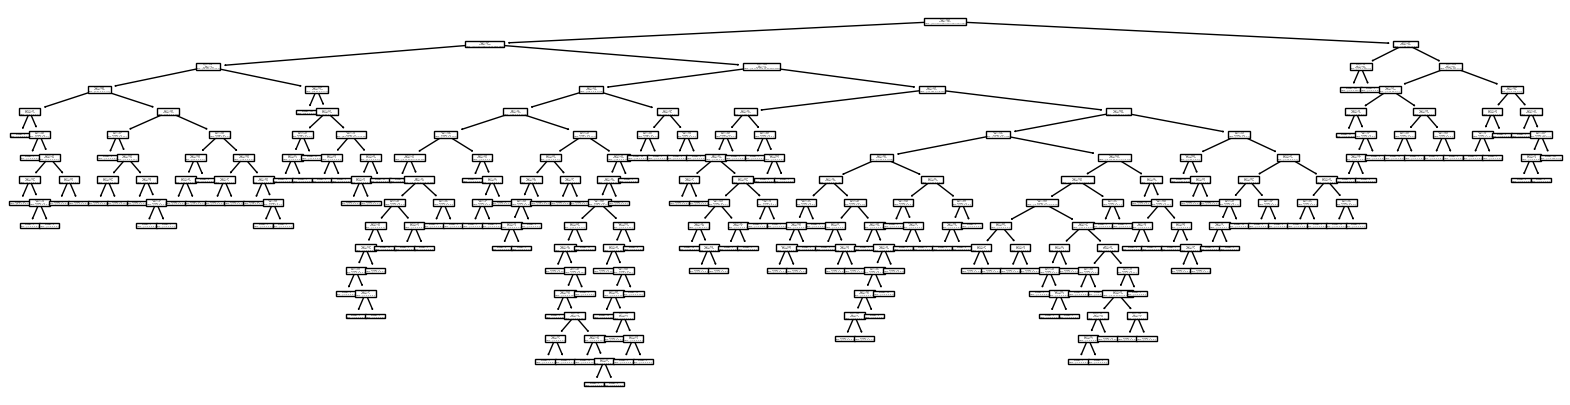

In [43]:
from sklearn import tree
plt.figure(figsize=(20,5))
tree.plot_tree(dtr)
plt.show()

In [44]:
pip install flask-ngrok

Note: you may need to restart the kernel to use updated packages.


In [45]:
import pickle

filename = 'prediksi_obesitas.sav'
pickle.dump(dtr,open(filename,'wb'))

In [1]:
import numpy as np
import pickle
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

# Muat model yang telah disimpan dengan Pickle
with open('prediksi_obesitas.sav', 'rb') as file:
    model = pickle.load(file)

# Inisialisasi Flask app
app = Flask(__name__)
run_with_ngrok(app)  # Untuk membuat URL publik menggunakan ngrok

@app.route('/api/predict', methods=['POST'])
def predict_obesity():
    data = request.json  # Ambil data dari form input frontend
    
    # Daftar fitur yang diperlukan oleh model
    required_features = [
        'Usia',
        'Jenis Kelamin',
        'Tinggi Badan',
        'Berat Badan',
        'Konsumsi Makanan Tinggi Kalori',
        'Riwayat Keluarga dengan Kegemukan',
        'Konsumsi Air Harian',
        'Konsumsi Makanan di Antara Waktu Makan'
    ]
    
    # Validasi: Pastikan jumlah fitur yang diterima sesuai
    if len(data.keys()) != len(required_features):
        return jsonify({
            'error': f'Jumlah fitur tidak sesuai. Diperlukan {len(required_features)} fitur, tetapi diterima {len(data.keys())}.',
            'expected_features': required_features
        }), 400  # Kode 400 berarti "Bad Request"
    
    # Validasi: Pastikan semua fitur yang diperlukan ada dalam data input
    missing_features = [feature for feature in required_features if feature not in data]
    if missing_features:
        return jsonify({
            'error': f'Terdapat fitur yang hilang: {missing_features}.',
            'expected_features': required_features
        }), 400

    # Jika validasi berhasil, lanjutkan proses prediksi
    usia = int(data['Usia'])
    jenis_kelamin = 1 if data['Jenis Kelamin'] == 'laki-laki' else 0
    tinggi_badan = float(data['Tinggi Badan'])
    berat_badan = float(data['Berat Badan'])
    konsumsi_kalori = 1 if data['Konsumsi Makanan Tinggi Kalori'] == 'ya' else 0
    riwayat_keluarga = 1 if data['Riwayat Keluarga dengan Kegemukan'] == 'ya' else 0

    # Mapping fitur kategorikal
    konsumsi_air_harian_mapping = {
        '<2 liter': 0,
        '<3 liter': 1,
        '<4 liter': 2
    }
    konsumsi_air_harian = konsumsi_air_harian_mapping[data['Konsumsi Air Harian']]

    konsumsi_makanan_mapping = {
        'no': 3,
        'Sometimes': 2,
        'Frequently': 1,
        'Always': 0
    }
    konsumsi_makanan_selingan = konsumsi_makanan_mapping[data['Konsumsi Makanan di Antara Waktu Makan']]

    # Data input dalam bentuk array untuk dimasukkan ke model
    input_data = np.array([[usia, jenis_kelamin, tinggi_badan, berat_badan,
                            konsumsi_kalori, riwayat_keluarga, konsumsi_air_harian,
                            konsumsi_makanan_selingan]])

    # Prediksi menggunakan model
    prediction = model.predict(input_data)

    # Kembalikan hasil prediksi dalam format JSON
    result = {'prediction': prediction[0]}
    return jsonify(result)

# Jalankan aplikasi Flask
app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
Exception in thread Thread-3:
Traceback (most recent call last):
  File "c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
        (self._dns_host, self.port),
    ...<2 lines>...
        socket_options=self.socket_options,
    )
  File "c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\util\connection.py", line 85, in create_connection
    raise err
  File "c:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    sock.connect(sa)
    ~~~~~~~~~~~~^^^^
ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\asus\AppData\Local\Programs\Py

In [3]:
import pickle
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Data contoh untuk melatih model
# Fitur: [Usia, Jenis Kelamin (0: Perempuan, 1: Laki-laki), Tinggi Badan, Berat Badan,
#         Konsumsi Kalori (0: Tidak, 1: Ya), Riwayat Keluarga (0: Tidak, 1: Ya),
#         Konsumsi Air Harian (0, 1, 2), Konsumsi Makanan Selingan (3, 2, 1, 0)]
X = np.array([
    [25, 1, 1.70, 70, 1, 0, 1, 2],
    [30, 0, 1.65, 80, 1, 1, 0, 1],
    [40, 1, 1.80, 95, 1, 1, 2, 0],
    [20, 0, 1.50, 45, 0, 0, 1, 3],
    [35, 1, 1.75, 85, 1, 1, 2, 1],
    [50, 0, 1.60, 60, 0, 1, 0, 2],
])

# Label: 0 = Tidak Obesitas, 1 = Obesitas
y = np.array([0, 1, 1, 0, 1, 0])

# Split data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Simpan model ke file pickle
with open('obesitas.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model telah disimpan ke file 'obesitas.pkl'")


Model telah disimpan ke file 'obesitas.pkl'
